#  Surprise Housing Case Study - Advance Regression

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

<b> Goals of the Case Study </b>
- To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

### Objective: 
- #### To interpret factors that can help in predicting the housing prices
- #### How well these factors describe the price.

### Project By:
- <b>   Smita Behera</b>

## Step 1: Reading and Understanding the Data

In [1]:
## Importing commonly required Data libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
#notebook setting to display all the rows and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
#Read data
data = pd.read_csv("train.csv")

In [4]:
#Checking data in general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Getting sense of the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Checking number of rows and columns in the data
data.shape

(1460, 81)

In [7]:
#Find columns with not null values
nullCols=data.isnull().sum()
nullCols.loc[nullCols.values>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### 🠉 Few observations based on above data :
- Number of columns have huge number of null values like Alley, PoolQC, Fence, MiscFeature.
- These columns will need to be filled based on data dictionary and column data analysis 
- Electrical has only on missing value and should be easy to fill
- Garage related variables have same number of null values, which means they are corelated to GarageType
- Bsmt related features as well have similar number of nul values and would be related

In [8]:
data.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

In [9]:
# Undertanding the nature of data based on number of unique values

df= pd.DataFrame([data.nunique().sort_values(ascending=False),data.count()])
df

,Id,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF,TotalBsmtSF,SalePrice,BsmtFinSF1,GarageArea,2ndFlrSF,MasVnrArea,WoodDeckSF,OpenPorchSF,BsmtFinSF2,EnclosedPorch,YearBuilt,LotFrontage,GarageYrBlt,ScreenPorch,YearRemodAdd,Neighborhood,LowQualFinSF,MiscVal,3SsnPorch,Exterior2nd,MSSubClass,Exterior1st,TotRmsAbvGrd,MoSold,OverallQual,Condition1,OverallCond,SaleType,PoolArea,RoofMatl,HouseStyle,BedroomAbvGr,Condition2,Functional,GarageType,SaleCondition,Heating,BsmtFinType2,BsmtFinType1,RoofStyle,Foundation,GarageQual,YrSold,GarageCars,GarageCond,FireplaceQu,HeatingQC,LotConfig,BldgType,MSZoning,ExterCond,Electrical,KitchenAbvGr,KitchenQual,MasVnrType,MiscFeature,Fence,ExterQual,BsmtQual,BsmtCond,BsmtExposure,LotShape,LandContour,BsmtFullBath,Fireplaces,FullBath,PavedDrive,GarageFinish,PoolQC,BsmtHalfBath,LandSlope,HalfBath,Street,CentralAir,Utilities,Alley
0,1460,1073,861,780,753,721,663,637,441,417,327,274,202,144,120,112,110,97,76,61,25,24,21,20,16,15,15,12,12,10,9,9,9,8,8,8,8,8,7,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,2,2,2,2
1,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1460,1201,1379,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1379,1460,1460,1422,1423,1460,1460,1379,1460,1460,1379,770,1460,1460,1460,1460,1460,1459,1460,1460,1452,54,281,1460,1423,1423,1422,1460,1460,1460,1460,1460,1460,1379,7,1460,1460,1460,1460,1460,1460,91


#### 🠉The columns with less number of uniques values are mostly categorical or ordinal. Alley, Utilities, CentralAir, Street,LandSlope etc are categorical while HalfBath, FullBath etc are ordinal

In [10]:
# Column MSSubClass is actually categorical but marked as integer
data['MSSubClass']=data['MSSubClass'].astype('object')
data['OverallCond']=data['OverallCond'].astype('object')
data['OverallQual']=data['OverallQual'].astype('object')


#### 🠋 The Year columns can be converted into numerical values to understand how newness has relevance for Sale price.

In [11]:
# As per data dictionary few of the columns are years. Changing them into number of years
data['Age_of_house']=datetime.date.today().year-data['YearBuilt']
data['Age_Garage']=datetime.date.today().year-data['GarageYrBlt']
data['Age_Reno']=datetime.date.today().year-data['YearRemodAdd']
data['Age_sold']=datetime.date.today().year-data['YrSold']

data.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'],axis=1, inplace=True)

## Visualizing data - categorical and non-categorical

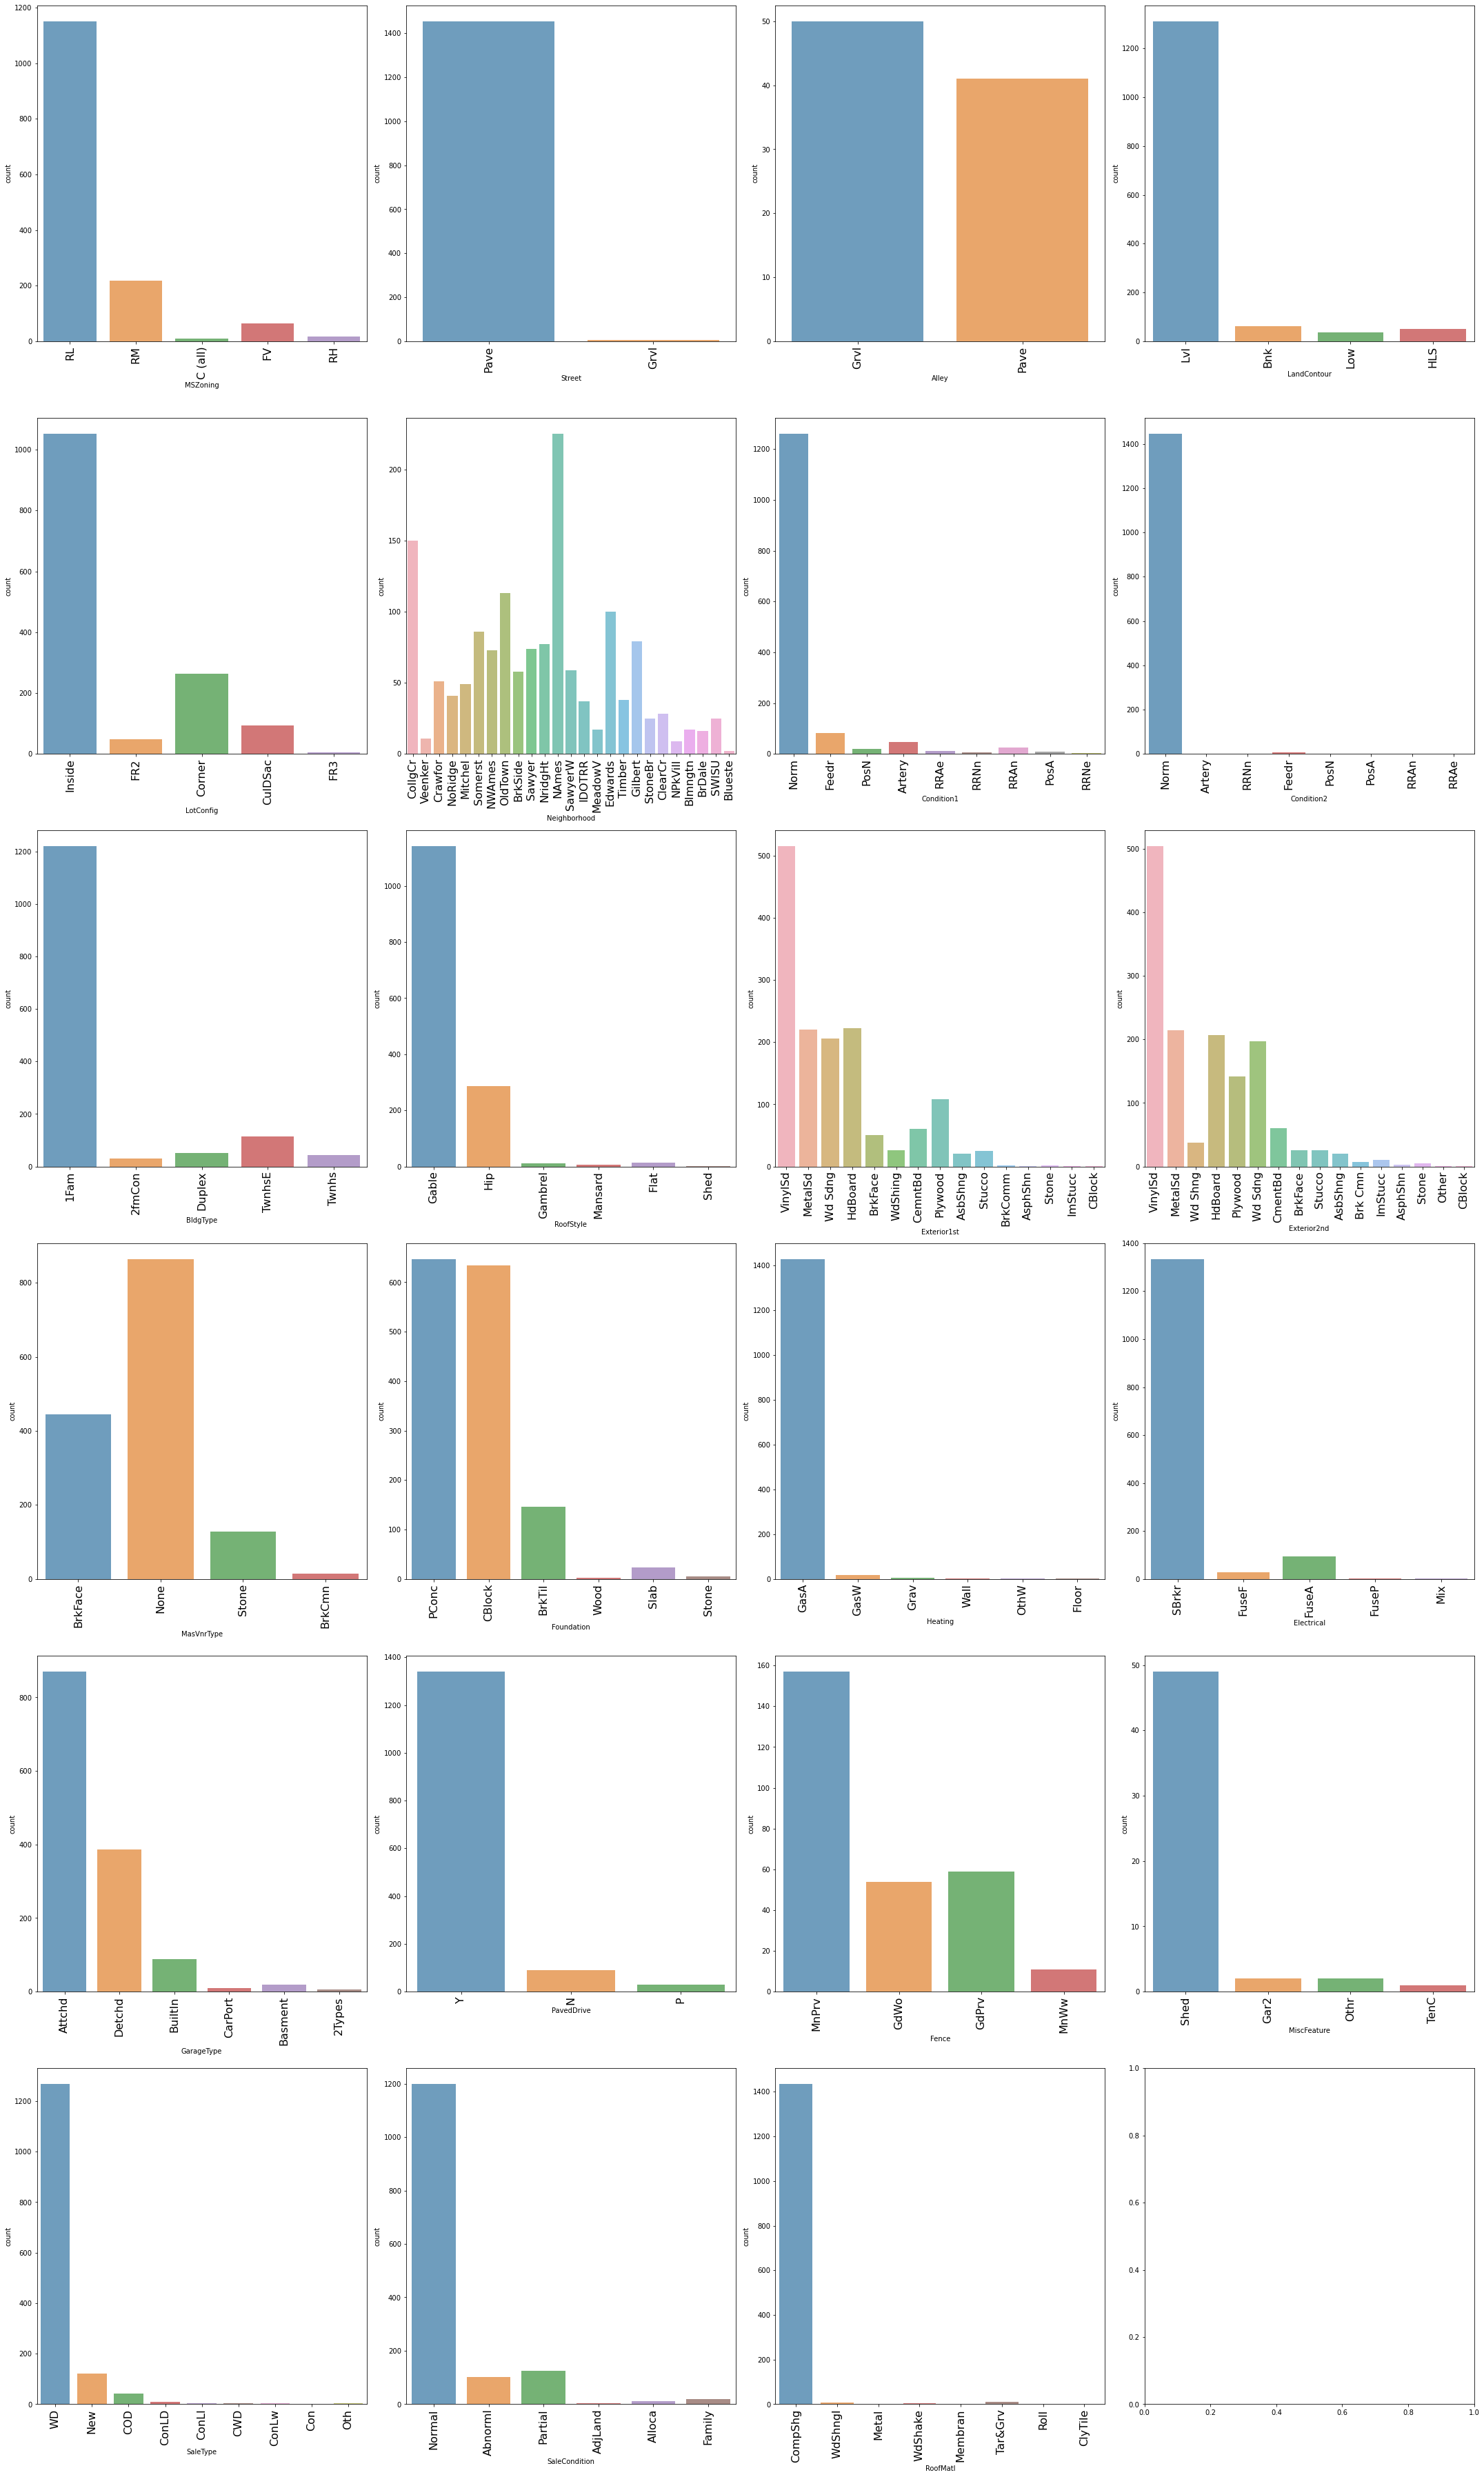

In [12]:
# Univariate Analysis
# Based on data dictionary and value_counts, we can classify the data into ordinal and nominal
# Note: This is based on guess and not neccessarily the right classification
# Checking the nominal variables
nominal_columns=['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType',
        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
         'PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition','RoofMatl']
fig, axes = plt.subplots(round(len(data[nominal_columns].columns) / 4), 4, figsize=(30, 50))

for i, ax in enumerate(axes.flatten()):
    if i < len(data[nominal_columns].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=16)
        sns.countplot(x=data[nominal_columns].columns[i], alpha=0.7, data=data[nominal_columns], ax=ax)

fig.tight_layout()  
plt.show()

### 🠉 For many columns it is observed that one value is predominant like Street, RoofMatl, Condition2, Heating

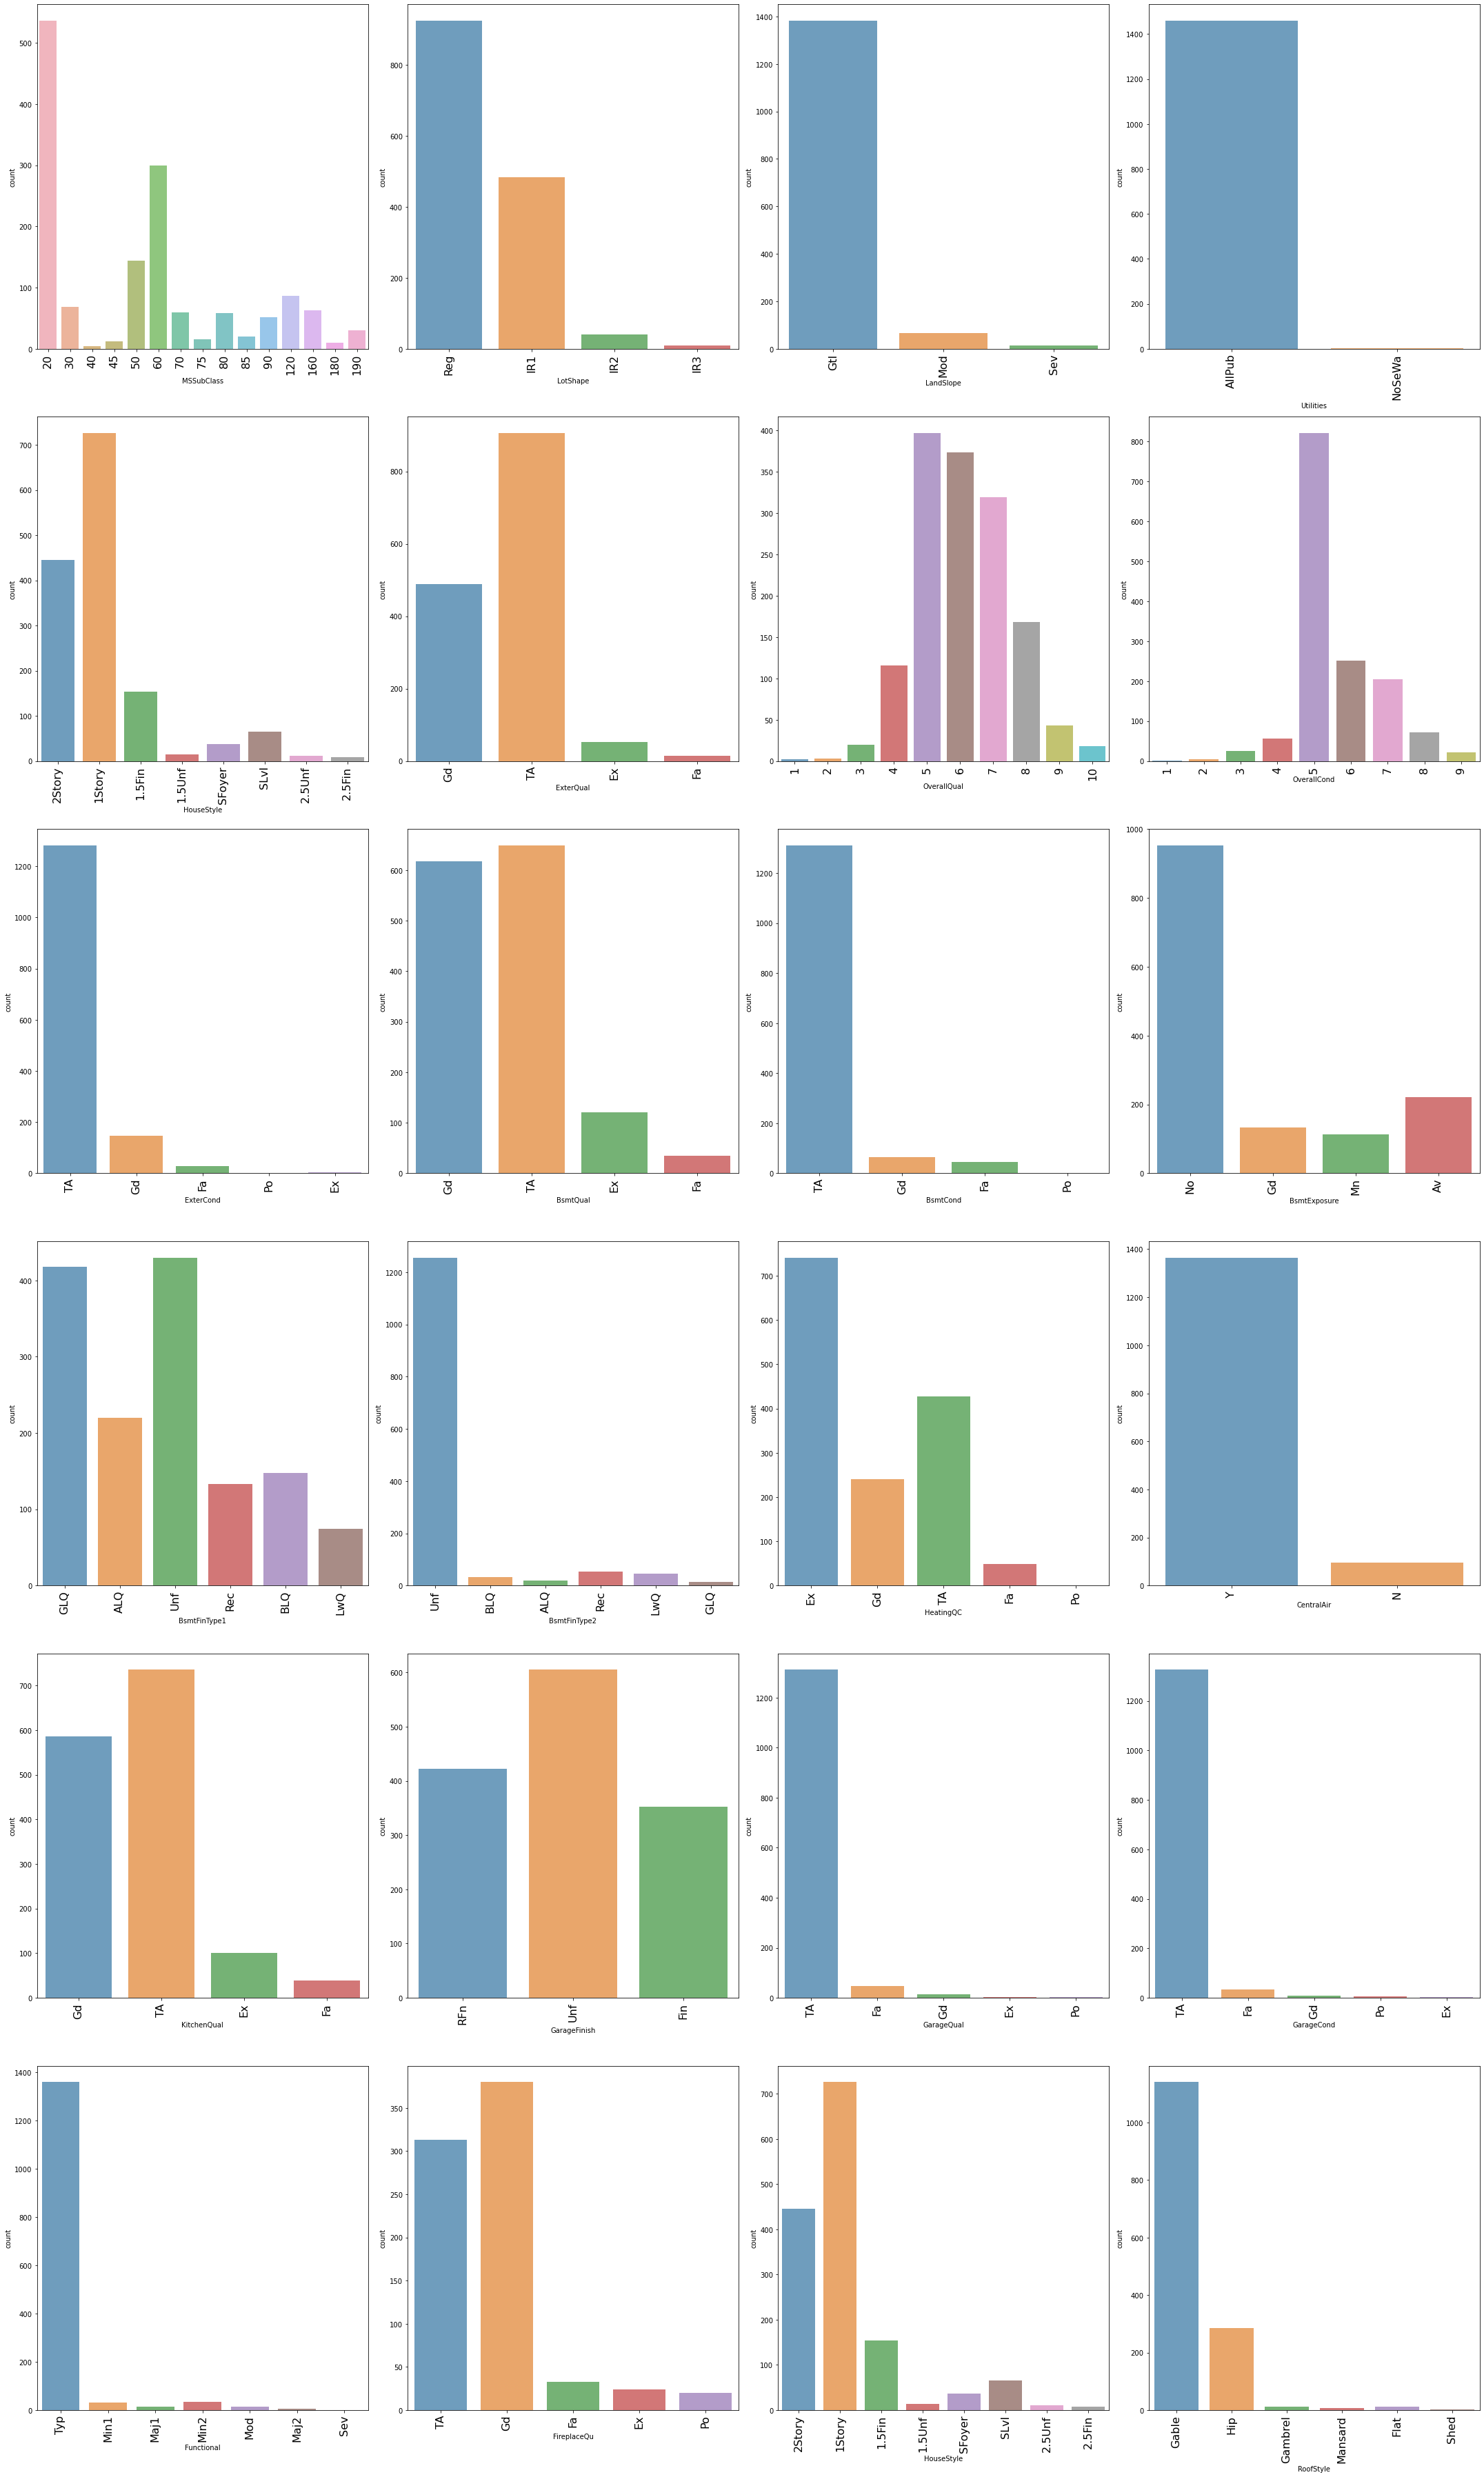

In [13]:
# Checking the ordinal variables
# Note: This is based on guess and not neccessarily the right classification
nominal_columns=['MSSubClass','LotShape','LandSlope','Utilities','HouseStyle','ExterQual','OverallQual', 'OverallCond',
                 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC' ,
                 'CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','Functional','FireplaceQu','HouseStyle',
                 'RoofStyle','PavedDrive','PoolQC']
fig, axes = plt.subplots(round(len(data[nominal_columns].columns) / 4), 4, figsize=(30, 50))

for i, ax in enumerate(axes.flatten()):
    if i < len(data[nominal_columns].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=16)
        sns.countplot(x=data[nominal_columns].columns[i], alpha=0.7, data=data, ax=ax)

fig.tight_layout()  
plt.show()

### 🠉 Similar to nominal, for many ordinal columns it is observed that one value is predominant like Utilities,Functional and features related to Garage.

### 🠋 Bivariate Analysis against Sale Price for continuous variables

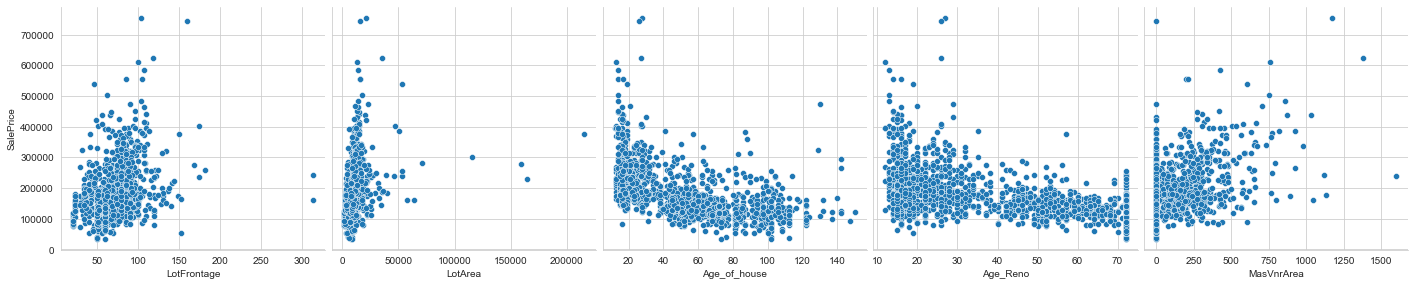

In [14]:
#Bivariate Analysis
# Plotting for the non categorcal columns based on data dictionary against the target variable
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['LotFrontage','LotArea','Age_of_house','Age_Reno','MasVnrArea' ], y_vars='SalePrice',height=4)
plt.show()

####  🠉 Age of house and Age since last renovation have a negative co-relation albeit not a very strong one.


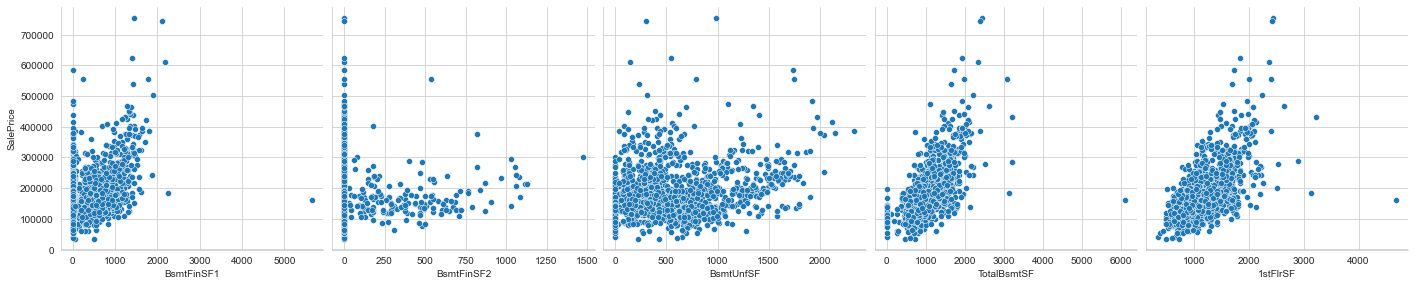

In [15]:
# Plotting for the non categorcal columns based on data dictionary against the target variable
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=[ 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', '1stFlrSF'], y_vars='SalePrice',height=4)

plt.show()

#### 🠉The Area columns like 1stFlrSF and TotalBsntSF show positive co-relation with Sales Price

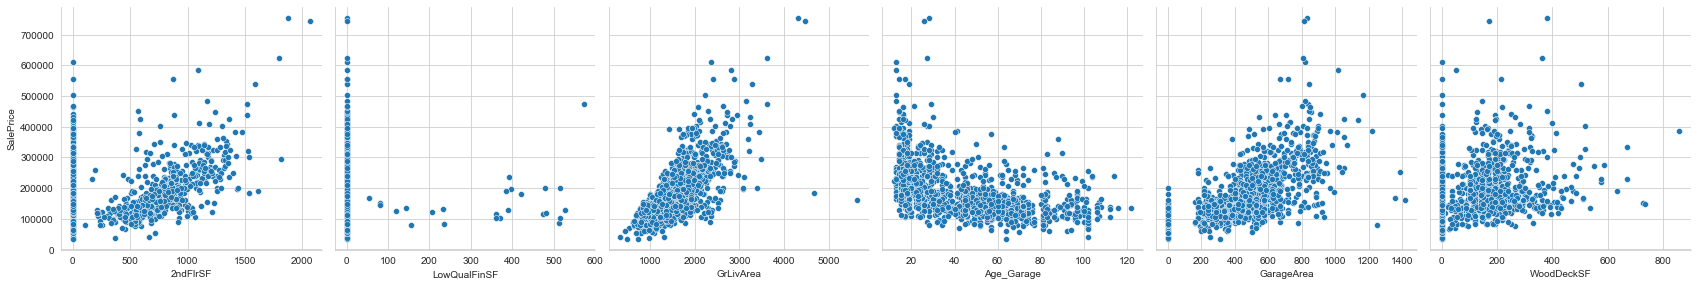

In [16]:
# Plotting for the non categorcal columns based on data dictionary
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['2ndFlrSF','LowQualFinSF','GrLivArea','Age_Garage','GarageArea','WoodDeckSF'], y_vars='SalePrice',height=4)
plt.show()

#### 🠉The Area columns like 2ndFlrSF, GrLivArea and GarageArea show positive co-relation with Sales Price. Age_garage shos a trend similar to age of house

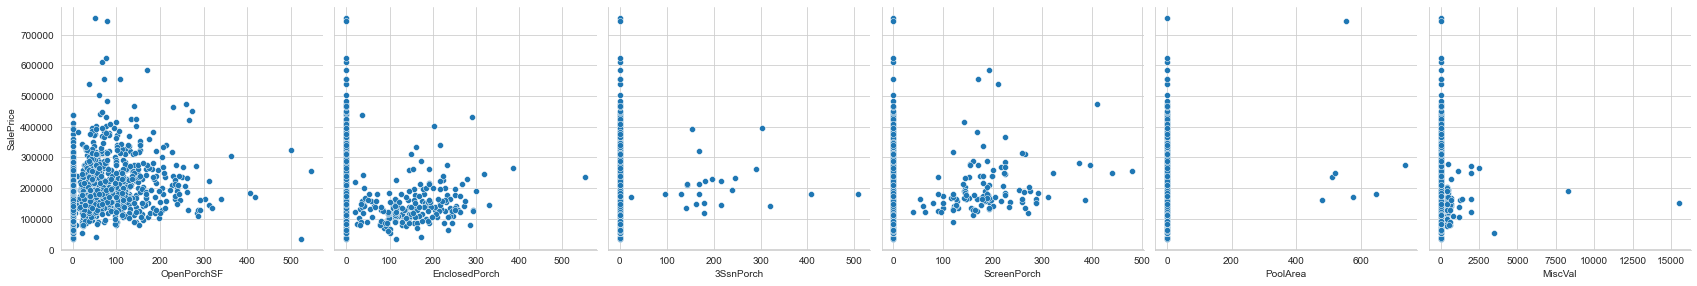

In [17]:
# Plotting for the non categorcal columns based on data dictionary
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], y_vars='SalePrice',height=4)

plt.show()

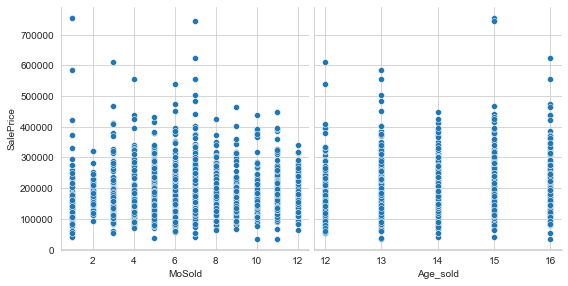

In [18]:
# Plotting for the non categorcal columns based on data dictionary
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['MoSold','Age_sold'], y_vars='SalePrice',height=4)

plt.show()

### Few Observations:
- Variables like TotalBsmtSF, 1stFleSF and 2ndFlrSF show postive linear trend
- GrLivArea seems to be postively corelated
- Age Of House(Based on Year Bulit) show a negative corelation to sales price
- LotArea does not show much of a raltionship
- Pool related variables show that column values are null because many do not have a pool

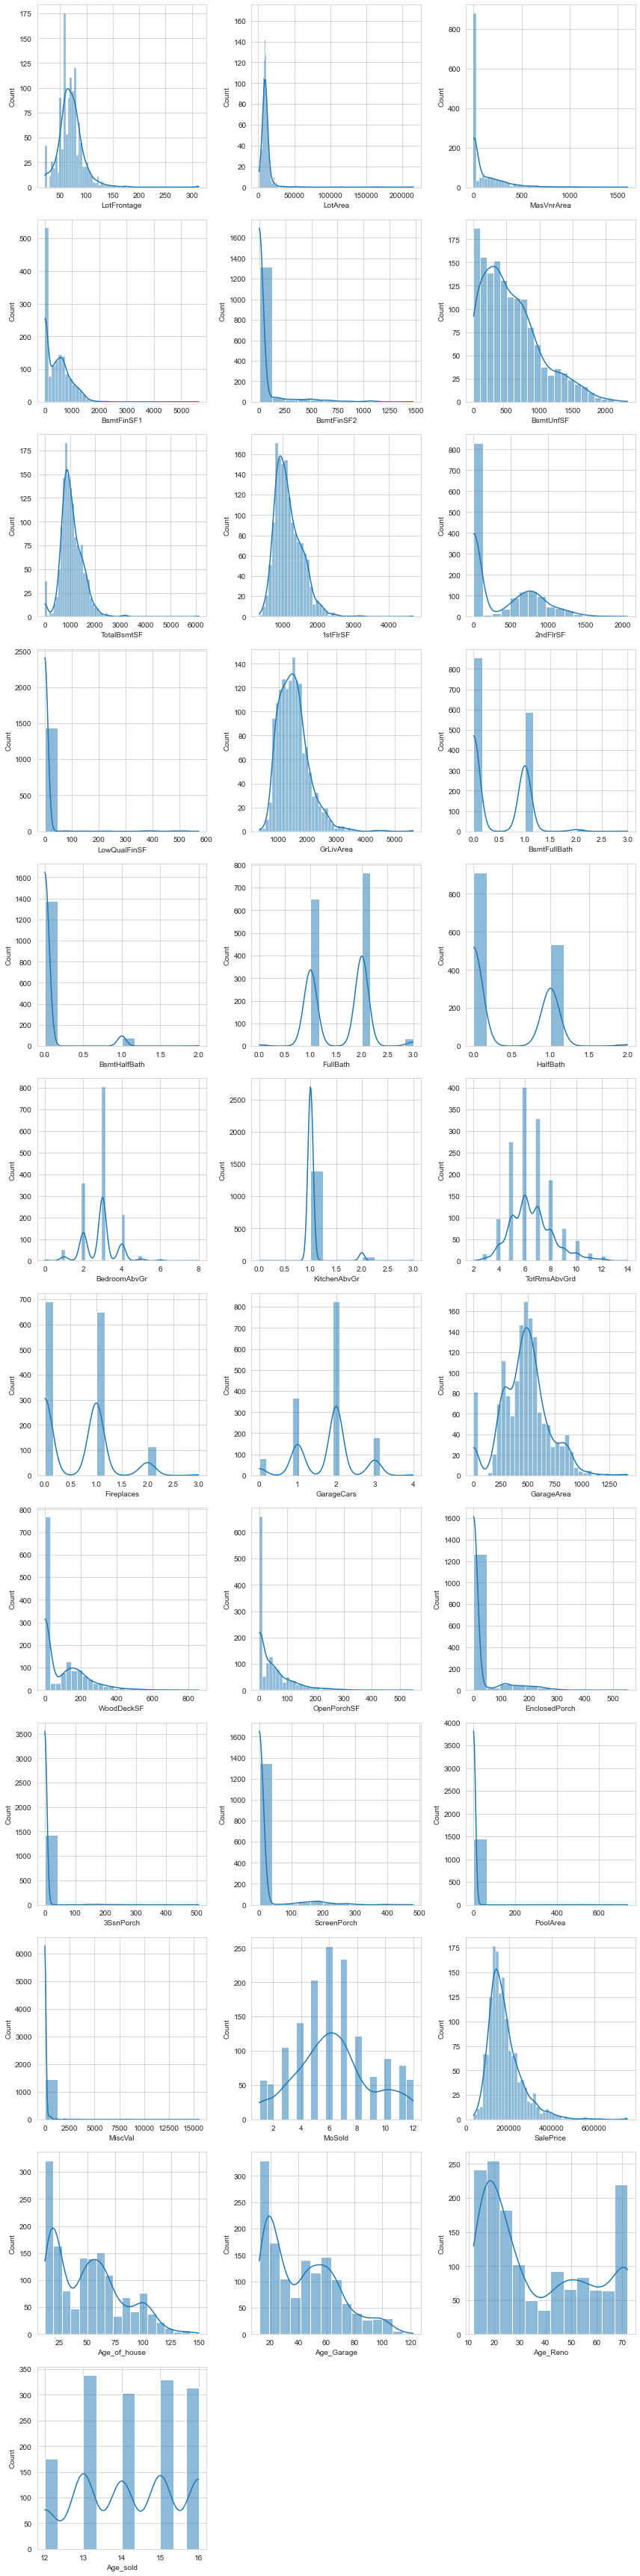

In [19]:
## Plotting histogram for all numeric values
cols,rows = 3,12
num_cols = data.select_dtypes(exclude='object').columns

num_cols=num_cols.drop('Id')
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    bin=sns.histplot(x = data[col], ax = ax,edgecolor='white',kde=True)

fig.tight_layout()  
plt.show()

### Folllowing are the conclusion drawn from above plots
- Outliers are detetced in many features including LotFrontaage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF,1stFlrSF, 2ndFlrSF, LowQualFinSF,GrLivArea, WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
- BsmtFinSF1,BsmtFinSF2, PoolArea have most of the values marked as zero, we can drop these columns
- MiscVal has modtly value of zero,and hence, MiscVal it's related column MiscFeature can be dropped
- House Sale is highest in the middle of the year indicated by MoSold
- More houses have been built recently and hence YearSold shows a high trend in 2000
- Only few continuous variables related to area of house or living room show normal distribtion

## Step 2: Data Cleaning

In [20]:
#Data in LotFrontage has only many missing values. Filling it with median value
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())

In [21]:
#Data in ELectrical has only one missing value. Filling it with most common value
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode().iloc[0])

In [22]:
# Based on data dictionary, filling the NA values
# The Alley values are null as there is no alley so filling with NoAlley
data['Alley'] = data['Alley'].fillna('NoAlley') 
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
# As observed earlier Bsmt had exactly 87 null values, finlling them with None as these do not have a basement.
data['BsmtQual'] = data['BsmtQual'].fillna("None")
data['BsmtCond'] = data['BsmtCond'].fillna("None")
data['BsmtExposure'] = data['BsmtExposure'].fillna("None")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("None")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("None")
# The FireplaceQu values are null as there is no fire place so filling with NoFireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('NoFireplace')
data['GarageType'] = data['GarageType'].fillna("None")
data['GarageFinish'] = data['GarageFinish'].fillna("None")
data['GarageQual'] = data['GarageQual'].fillna("None")
data['GarageCond'] = data['GarageCond'].fillna("None")
data['Age_Garage']= data['Age_Garage'].fillna(0)
# Filling with No Pool as they do not have a pool
data['PoolQC'] = data['PoolQC'].fillna('NoPool')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Fence'] = data['Fence'].fillna('NoFence')
# Filling with NoData for a single null value
data['Electrical'] = data['Electrical'].fillna("NoData")

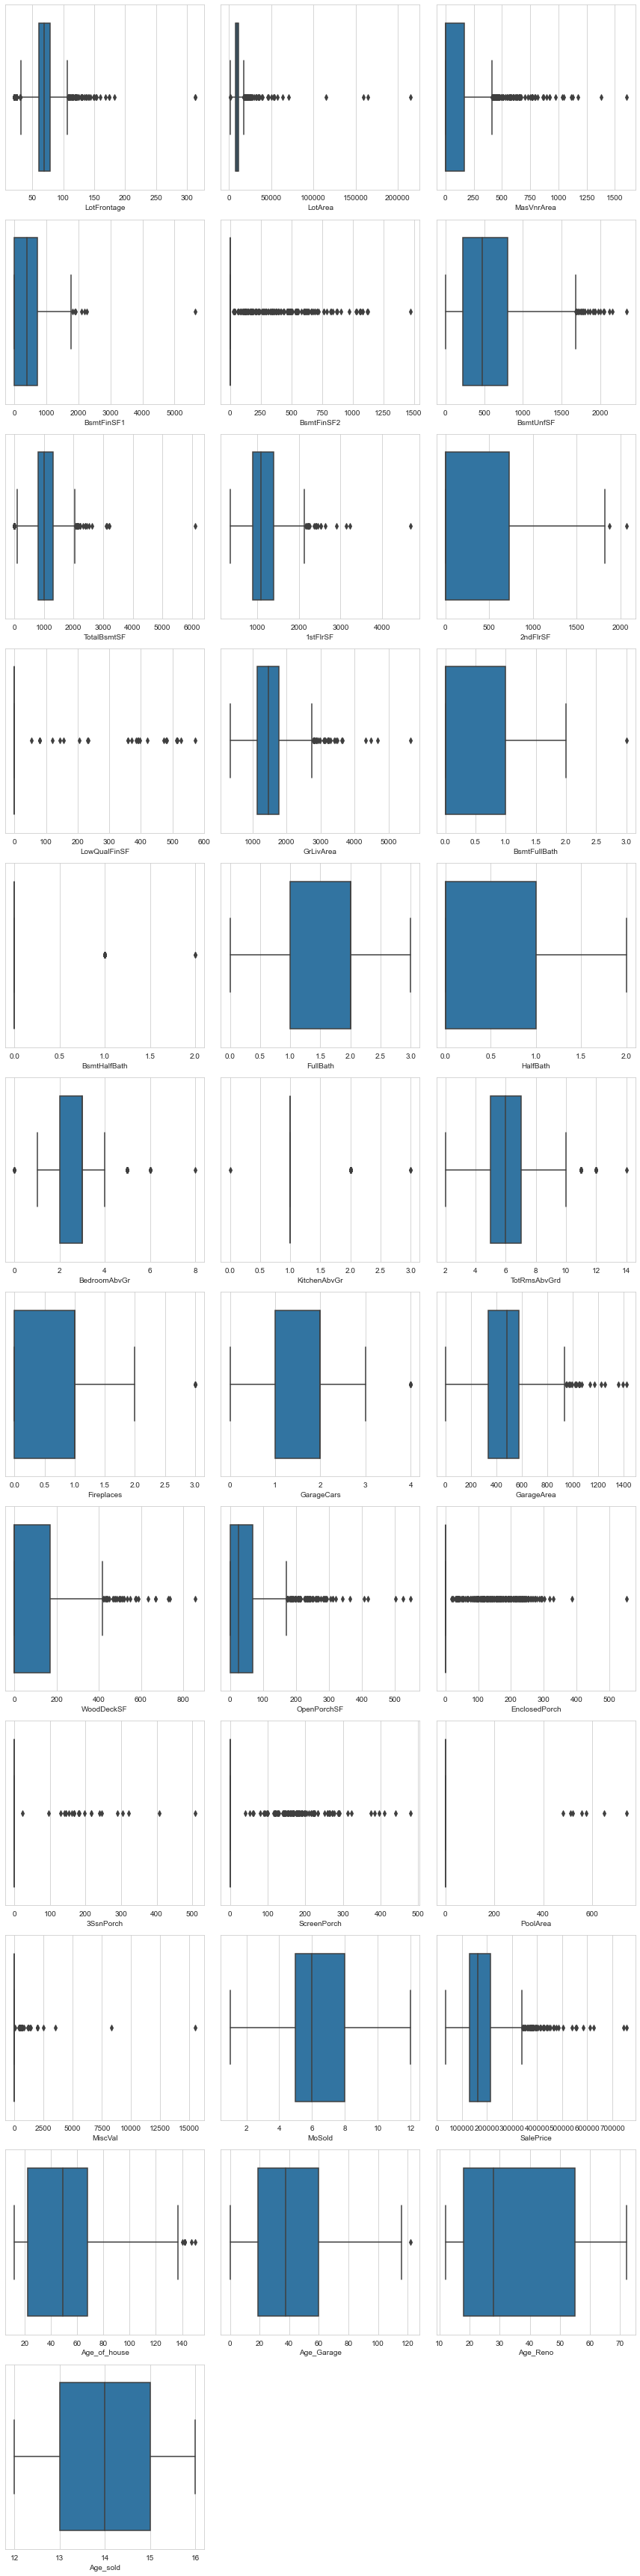

In [23]:
## Plotting histogram for all numeric values to understand presence of outliers
cols,rows = 3,12
num_cols = data.select_dtypes(exclude='object').columns
num_cols=num_cols.drop('Id')
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = data[col], ax = ax)

fig.tight_layout()  
plt.show()


## Analyzing Categorical Data against Target variable

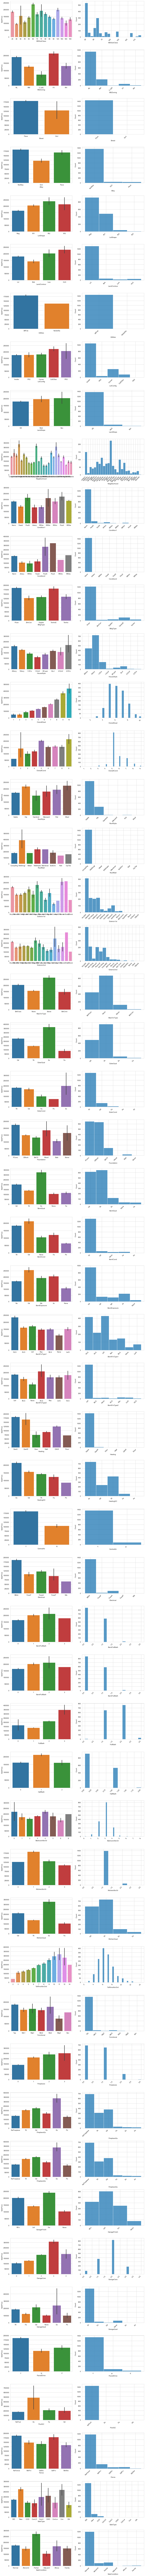

In [24]:
cols,rows = 2,53
num_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','FireplaceQu','GarageFinish','GarageCars','GarageQual','PavedDrive','PoolQC','Fence','SaleType','SaleCondition' ]
fig = plt.figure(figsize= (cols*6,rows*4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,(i+1)*2-1)
    sns.barplot(x=num_cols[i],y='SalePrice',data=data)
    ax=fig.add_subplot(rows, cols, (i+1)*2)
    sns.histplot(data=data,x=num_cols[i])
    plt.xticks(rotation=45, ha='right')    
fig.tight_layout()  
plt.show()

In [25]:
#Based on the above plots, a few of the features clearly show one prominent value. Dropping these columns

data.drop(['Street','Utilities','Condition2','RoofMatl','KitchenAbvGr','PoolQC'],axis=1,inplace=True)

In [26]:
# The plots above also, show a good amount outliers existing for each feature. These are being replaced by value based IQR *1.5 + 75% Quantile and -IQR *1.5 + 25% Quantile
features_w_outliers=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
for feature in features_w_outliers:
    if feature!='SalePrice':
        IQR = data[feature].quantile(.75) - data[feature].quantile(.25) 
        max_value = data[feature].quantile(.75)+1.5*IQR
        min_value = data[feature].quantile(.25)-1.5*IQR
        data[feature][data[feature] > max_value] = max_value
        data[feature][data[feature] < min_value ] = min_value

In [27]:
# Checking if there are columns with one unique value since it won't affect our analysis
unqData=data.nunique()
unqData.loc[unqData==1].count()
unqData.drop(unqData.loc[unqData==1].index,inplace=True)

## Corelation in data

In [28]:
# correlation matrix against the Sale Price
corr_matrix = data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708153
GarageCars       0.640409
TotalBsmtSF      0.636999
GarageArea       0.630138
1stFlrSF         0.620743
FullBath         0.560664
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
MasVnrArea       0.448618
LotArea          0.432216
BsmtFinSF1       0.400330
LotFrontage      0.371542
OpenPorchSF      0.369024
WoodDeckSF       0.330378
2ndFlrSF         0.316547
HalfBath         0.284108
BsmtFullBath     0.227122
BsmtUnfSF        0.203278
BedroomAbvGr     0.168213
MoSold           0.046432
Age_sold         0.028923
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
Age_Garage      -0.343460
Age_Reno        -0.507101
Age_of_house    -0.522897
BsmtFinSF2            NaN
LowQualFinSF          NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
Name: SalePrice, dtype: float64

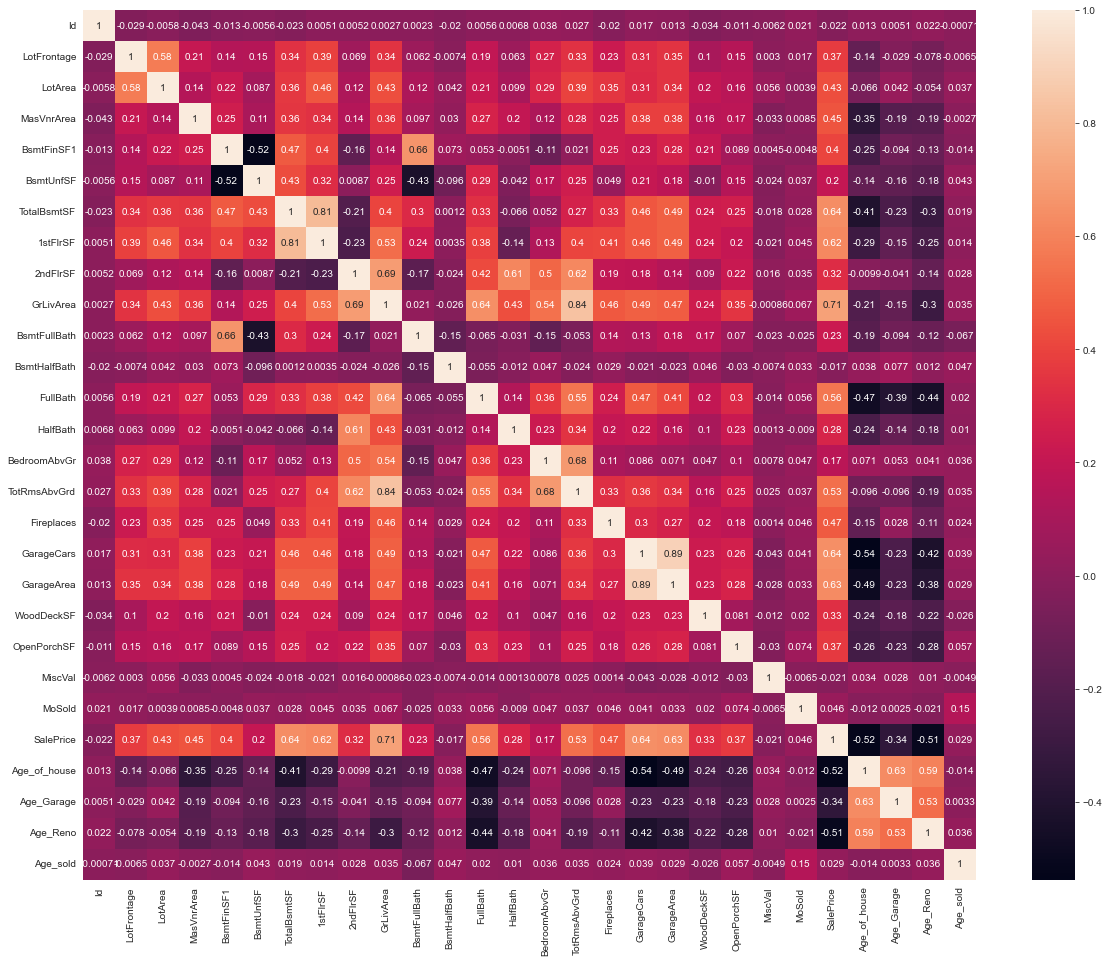

In [29]:
data_corr=data.drop(['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'],axis=1)
plt.figure(figsize=(20,16))
corr_matrix["SalePrice"].sort_values(ascending=False)
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

### Few inferences:
- Sale price and Age of House have a high postive co-relation
- Sale Price and OverallQuality have 


## Step 3: Data Preparation

In [30]:
# List of Label encoded categorical features (Ordinal)
data['LotShape'] = data['LotShape'].replace({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
data['LandSlope'] = data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
data['HouseStyle'] = data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
data['ExterQual'] = data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['ExterCond'] = data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})
data['KitchenQual'] = data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['Functional'] = data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
data['FireplaceQu'] = data['FireplaceQu'].map({'NoFireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [31]:
# Hot Encoding of the other categorical features (Nominal)
oneHotEncodedFeatures=['MSZoning',  'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'BldgType',
                       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']
dummy_df = pd.get_dummies(data[oneHotEncodedFeatures], drop_first=True)

In [32]:
#Check Shape
dummy_df.shape

(1460, 129)

In [33]:
# Drop the original columns after adding the dummy variables
data.drop(oneHotEncodedFeatures,axis=1,inplace=True)

In [34]:
# Adding the dummy variables to the original dataframe
data = pd.concat([data,dummy_df],axis=1)

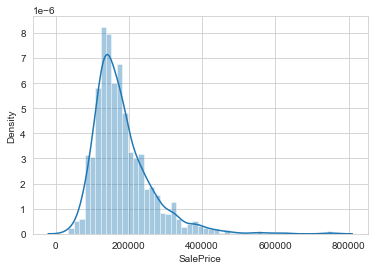

In [35]:
# target variable: price of car
sns.distplot(data['SalePrice'])
plt.show()



In [36]:
#skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 1.882876


In [37]:
# Lograrithmic transformation of data to achieve normal distribution
data['SalePrice']=np.log(data['SalePrice'])

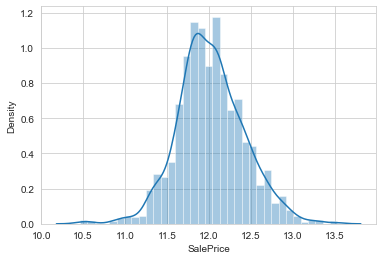

In [38]:
#Replotting
sns.distplot(data['SalePrice'])
plt.show()

In [39]:
# Diving dependent and indpendent variables
X= data.drop(['SalePrice'], axis=1)
y= data['SalePrice']

## Step 4: Splitting the Data into Training and Testing Sets

In [40]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [41]:
# Scale the data
stdScaler = StandardScaler()
stdScaler.fit(X_train)
X_train_scaled= pd.DataFrame(data=stdScaler.transform(X_train), columns=X_train.columns)
X_test_scaled= pd.DataFrame(data=stdScaler.transform(X_test), columns=X_test.columns)

## Step 5: Building different types of model - Linear, Ridge and Lasso

In [42]:
# Genric Function for OLS fit
import statsmodels.api as sm
def fitOLS(y, X):
    X = sm.add_constant(X)
    # create a fitted model in one line
    lm=sm.OLS(y.values.reshape(-1,1),X).fit()
    print(lm.summary())
    return lm

In [43]:
## Function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X) : 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm_bc = LinearRegression()
lm_bc.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
##Applying RFE to obtain top 45 features
rfe = RFE(lm_bc, n_features_to_select=45)  
rfe = rfe.fit(X_train_scaled, y_train)

In [46]:
#Checking list and coefficients
rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
rfe_ranking

[('Id', False, 105),
 ('MSSubClass', True, 1),
 ('LotFrontage', False, 29),
 ('LotArea', True, 1),
 ('LotShape', False, 94),
 ('LandSlope', False, 59),
 ('HouseStyle', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 81),
 ('ExterQual', False, 136),
 ('ExterCond', False, 43),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 72),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 26),
 ('BsmtFinSF1', False, 135),
 ('BsmtFinType2', False, 60),
 ('BsmtFinSF2', False, 8),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 17),
 ('BsmtHalfBath', False, 92),
 ('FullBath', False, 61),
 ('HalfBath', False, 71),
 ('BedroomAbvGr', False, 75),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 76),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 49),
 ('

In [47]:
# Columns List which imapct the model
col_list1 = X_train_scaled.columns[rfe.support_]
col_drop = X_train_scaled.columns[~rfe.support_]
col_list1                                   

Index(['MSSubClass', 'LotArea', 'HouseStyle', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'Age_of_house', 'Age_Garage', 'Age_Reno', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Foundation_PConc', 'Foundation_Slab', 'Heating_GasA', 'Heating_GasW', 'GarageType_Attchd', 'MiscFeature_None', 'MiscFeature_Shed', 'SaleType_New', 'SaleCondition_Normal'], dtype='object')

In [48]:
# Applying OLS
X_train_scaled_0=X_train_scaled[col_list1]
lm_bc=fitOLS(y_train, X_train_scaled_0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     314.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:20   Log-Likelihood:                 956.43
No. Observations:                1168   AIC:                            -1821.
Df Residuals:                    1122   BIC:                            -1588.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [49]:
##p-value is within range and r value and adjusted r value are good. Check VIF for multicolinearity
checkVIF(X_train_scaled_0)

                Features    VIF
12             GrLivArea  36.10
24           MSZoning_RL  30.45
11              2ndFlrSF  27.12
25           MSZoning_RM  23.22
10              1stFlrSF  22.98
22           MSZoning_FV  12.06
41      MiscFeature_None   9.19
42      MiscFeature_Shed   9.07
8            TotalBsmtSF   6.66
19          Age_of_house   5.44
31  Neighborhood_Somerst   4.22
3            OverallQual   3.87
5               BsmtQual   3.70
20            Age_Garage   3.37
17            GarageCars   3.16
18            GarageQual   2.90
21              Age_Reno   2.78
23           MSZoning_RH   2.68
36      Foundation_PConc   2.61
13           KitchenQual   2.58
38          Heating_GasA   2.46
39          Heating_GasW   2.39
16          GarageFinish   2.34
2             HouseStyle   2.25
43          SaleType_New   2.21
1                LotArea   2.12
0             MSSubClass   1.99
44  SaleCondition_Normal   1.85
4            OverallCond   1.82
40     GarageType_Attchd   1.75
9       

In [50]:
#Dropping GrLivArea due to high VIF
col_list2=col_list1.drop('GrLivArea')
X_train_scaled_2=X_train_scaled_0[col_list2]
lm_bc2=fitOLS(y_train, X_train_scaled_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     314.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:20   Log-Likelihood:                 943.29
No. Observations:                1168   AIC:                            -1797.
Df Residuals:                    1123   BIC:                            -1569.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [51]:
##p-value is within range and r value and adjusted r value are good. Check VIF for multicolinearity
checkVIF(X_train_scaled_2)

                Features    VIF
23           MSZoning_RL  30.37
24           MSZoning_RM  23.17
21           MSZoning_FV  12.05
40      MiscFeature_None   9.17
41      MiscFeature_Shed   9.05
8            TotalBsmtSF   6.66
18          Age_of_house   5.39
10              1stFlrSF   5.38
30  Neighborhood_Somerst   4.22
3            OverallQual   3.87
5               BsmtQual   3.69
19            Age_Garage   3.36
16            GarageCars   3.16
17            GarageQual   2.90
20              Age_Reno   2.78
22           MSZoning_RH   2.68
11              2ndFlrSF   2.62
35      Foundation_PConc   2.59
12           KitchenQual   2.58
37          Heating_GasA   2.46
38          Heating_GasW   2.39
15          GarageFinish   2.34
2             HouseStyle   2.22
42          SaleType_New   2.21
1                LotArea   2.12
0             MSSubClass   1.99
43  SaleCondition_Normal   1.84
4            OverallCond   1.81
39     GarageType_Attchd   1.74
9              HeatingQC   1.74
36      

In [52]:
# Dropping MSZoning_RL due to high VIF
col_list3=col_list2.drop('MSZoning_RL')
X_train_scaled_3=X_train_scaled_2[col_list3]
lm_bc3=fitOLS(y_train, X_train_scaled_3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     316.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:21   Log-Likelihood:                 933.90
No. Observations:                1168   AIC:                            -1780.
Df Residuals:                    1124   BIC:                            -1557.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [53]:
##p-value is within range and r value and adjusted r value are good. Check VIF for multicolinearity
checkVIF(X_train_scaled_3)

                Features   VIF
39      MiscFeature_None  9.17
40      MiscFeature_Shed  9.04
8            TotalBsmtSF  6.66
10              1stFlrSF  5.38
18          Age_of_house  5.20
29  Neighborhood_Somerst  4.21
21           MSZoning_FV  4.03
3            OverallQual  3.86
5               BsmtQual  3.68
19            Age_Garage  3.34
16            GarageCars  3.15
17            GarageQual  2.89
20              Age_Reno  2.78
11              2ndFlrSF  2.62
34      Foundation_PConc  2.59
12           KitchenQual  2.58
36          Heating_GasA  2.46
37          Heating_GasW  2.38
15          GarageFinish  2.33
2             HouseStyle  2.22
41          SaleType_New  2.20
1                LotArea  2.11
0             MSSubClass  1.99
42  SaleCondition_Normal  1.82
4            OverallCond  1.80
23           MSZoning_RM  1.76
38     GarageType_Attchd  1.74
9              HeatingQC  1.74
35       Foundation_Slab  1.71
14            Fireplaces  1.63
6           BsmtExposure  1.60
7       

In [54]:
# Dropping MiscFeature_None due to high VIF
col_list4=col_list3.drop('MiscFeature_None')
X_train_scaled_4=X_train_scaled_3[col_list4]
lm_bc4=fitOLS(y_train, X_train_scaled_4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     323.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:21   Log-Likelihood:                 932.39
No. Observations:                1168   AIC:                            -1779.
Df Residuals:                    1125   BIC:                            -1561.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [55]:
#Dropping MSZoning_FV due to high p value
col_list5=col_list4.drop('MSZoning_FV')
X_train_scaled_5=X_train_scaled_4[col_list5]
lm_bc5=fitOLS(y_train, X_train_scaled_5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     331.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:21   Log-Likelihood:                 932.22
No. Observations:                1168   AIC:                            -1780.
Df Residuals:                    1126   BIC:                            -1568.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [56]:
#Dropping MiscFeature_Shed due to high p value
col_list6=col_list5.drop('MiscFeature_Shed')
X_train_scaled_6=X_train_scaled_5[col_list6]
lm_bc6=fitOLS(y_train, X_train_scaled_6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     339.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:21   Log-Likelihood:                 931.76
No. Observations:                1168   AIC:                            -1782.
Df Residuals:                    1127   BIC:                            -1574.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0275 

In [57]:
##p-value is within range and r value and adjusted r value are good. Check VIF for multicolinearity
checkVIF(X_train_scaled_6)

                Features   VIF
8            TotalBsmtSF  6.62
10              1stFlrSF  5.35
18          Age_of_house  5.19
3            OverallQual  3.86
5               BsmtQual  3.68
19            Age_Garage  3.33
16            GarageCars  3.12
17            GarageQual  2.88
20              Age_Reno  2.76
11              2ndFlrSF  2.59
33      Foundation_PConc  2.58
12           KitchenQual  2.57
35          Heating_GasA  2.46
36          Heating_GasW  2.37
15          GarageFinish  2.32
2             HouseStyle  2.21
38          SaleType_New  2.20
1                LotArea  2.08
0             MSSubClass  1.97
39  SaleCondition_Normal  1.82
4            OverallCond  1.78
22           MSZoning_RM  1.74
37     GarageType_Attchd  1.74
9              HeatingQC  1.73
34       Foundation_Slab  1.67
14            Fireplaces  1.63
6           BsmtExposure  1.60
7              BsmtUnfSF  1.52
27  Neighborhood_NridgHt  1.50
28  Neighborhood_Somerst  1.37
26  Neighborhood_NoRidge  1.29
25  Neig

## VIF and p-value are reasonable. Finalizing the Linear Regression

In [58]:
X_train_lin = sm.add_constant(X_train_scaled_6,has_constant='add')
y_pred_train_lin = lm_bc6.predict(X_train_lin)


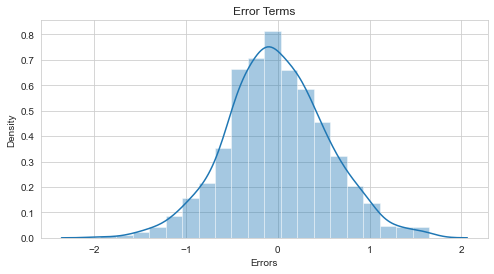

In [59]:
# Plot the histogram of the error terms
plt.figure(figsize = (8,4))
res = y_train - y_pred_train_lin
sns.distplot(res, bins =20)
plt.title('Error Terms')

plt.xlabel('Errors')
plt.show()

In [60]:
#Replacing orginal data with selected coefficients

X_test_scaled_lin = sm.add_constant(X_test_scaled[col_list6],has_constant='add')


In [61]:
# Predicting the data on test
from sklearn.metrics import mean_squared_error,r2_score

#y_pred_train = lm_bc6.predict(X_train_scaled_6)
y_pred_test_lin = lm_bc6.predict(sm.add_constant(X_test_scaled_lin))

In [62]:
# Creating metrics for Linear Regression to compare with other regression methods
metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lin)
print('R2 score (train) : ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lin)
print('R2 score (test) :',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lin))
print('RMSE (train) : ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lin))
print('RMSE (test) : ', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lin)
print('MSE (train) :',  mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lin)
print('MSE (test) :',  mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score (train) :  0.923440755651635
R2 score (test) : 0.8684856777991414
RMSE (train) :  277.84409420410225
RMSE (test) :  20.875282143139106
MSE (train) : 0.011874616770191212
MSE (test) : 0.023226874838917715


## Model Building and Evaluation

## Ridge Regression

In [63]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500,700, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

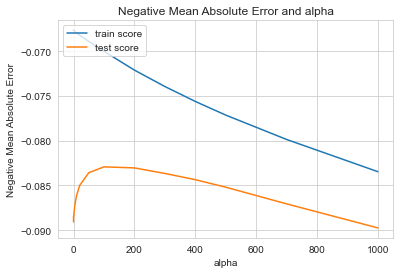

In [64]:
# plotting mean test and train scoes with alpha 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [67]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
print(ridge.coef_)

[-2.23905639e-03 -7.11277853e-03  6.77796812e-03  2.64316205e-02
  1.76667386e-03  3.49228098e-03  9.27980472e-03  5.68058745e-02
  3.64866200e-02  2.28538404e-03  8.82666918e-03 -3.62897340e-03
  1.59760713e-02 -1.26229691e-03  1.08724495e-02  9.93065185e-03
  1.99775333e-02  8.11528927e-04  0.00000000e+00 -4.38604908e-03
  3.53365264e-02  1.01987455e-02  8.33404267e-03  3.81151897e-02
  3.20170288e-02  0.00000000e+00  5.65068921e-02  1.12611193e-02
  4.05427570e-04  1.47773328e-02  9.81111490e-03  7.93719070e-04
  1.80331713e-02  1.16893723e-02 -2.10616125e-02  1.04364924e-02
  8.35473542e-03  6.91427284e-03  1.56708042e-02  1.38251871e-02
  8.26432165e-03  1.02195633e-03  1.09034993e-02  1.08377437e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.45537417e-05 -1.23290571e-03 -2.84819192e-02 -5.27139543e-03
 -1.30845550e-02  3.47851474e-03  9.57375869e-03  9.92705583e-03
  1.17917593e-02  4.45669399e-03 -2.82614652e-03  4.31600244e-03
  3.12093822e-03  1.10583

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score (train) : ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score (test) : ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RMSE (train) : ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RMSE (test) : ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (train) : ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (test) : ',mse_test_lr)
metric2.append(mse_test_lr**0.5)


R2 score (train) :  0.9320568423830223
R2 score (test) :  0.8758256049742786
RMSE (train) :  12.308653147862847
RMSE (test) :  6.403724402733098
MSE (train) :  0.010538230434814081
MSE (test) :  0.021930563023058555


## Lasso Regression

In [69]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

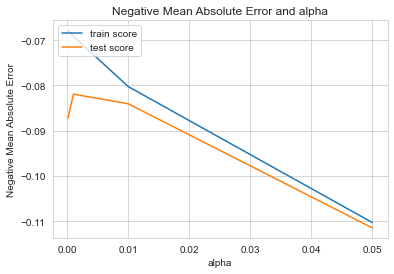

In [70]:
# plotting mean test and train scoes with alpha 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<0.1]
cv_results[['param_alpha','mean_train_score','mean_test_score']]
# cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# # plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [72]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_scaled, y_train) 

Lasso(alpha=0.001)

In [73]:
lasso.coef_

array([-5.07211974e-04, -1.04555138e-02,  4.20328530e-03,  3.02780294e-02,
        9.03937081e-05,  2.56699440e-03,  8.07590613e-03,  6.84983640e-02,
        4.23243063e-02,  0.00000000e+00,  2.64447435e-03, -3.33781901e-03,
        1.15901675e-02, -0.00000000e+00,  1.00595306e-02,  7.54567480e-03,
        1.52297829e-02, -0.00000000e+00,  0.00000000e+00, -1.20795756e-02,
        4.25336394e-02,  1.08846922e-02,  5.99281556e-03,  2.09918930e-02,
        1.56125441e-02,  0.00000000e+00,  1.05349642e-01,  1.04258156e-02,
        0.00000000e+00,  6.41889042e-03,  2.70841910e-03, -0.00000000e+00,
        1.61914995e-02,  0.00000000e+00, -2.31569673e-02,  1.00057484e-02,
        4.54724868e-03,  5.80111902e-03,  1.85346260e-02,  9.29128140e-03,
        7.26549564e-03,  0.00000000e+00,  1.02378470e-02,  8.75382059e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.30317441e-03, -5.12102329e-02, -2.86944052e-03,
       -1.00954433e-02,  

In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score (train) : ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score (test) : ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RMSE (train) : ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RMSE (test) : ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (train) : ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (test) : ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score (train) :  0.9327281741260686
R2 score (test) :  0.8760015022769561
RMSE (train) :  12.187033990583028
RMSE (test) :  6.394653306801468
MSE (train) :  0.010434104443992318
MSE (test) :  0.021899497626032424


## Step 6: Comparing the different models

In [75]:
## First create empty datafame with all the independent variables as indices
vCoefficients = pd.DataFrame(index=X.columns)
vCoefficients.rows = X.columns
vCoefficients['Ridge'] = ridge.coef_
vCoefficients['Lasso'] = lasso.coef_
vCoefficients

,Ridge,Lasso
Id,-0.002239,-0.000507
MSSubClass,-0.007113,-0.010456
LotFrontage,0.006778,0.004203
LotArea,0.026432,0.030278
LotShape,0.001767,0.000090
LandSlope,0.003492,0.002567
HouseStyle,0.009280,0.008076
OverallQual,0.056806,0.068498
OverallCond,0.036487,0.042324
MasVnrArea,0.002285,0.000000


### As expected, no coeffient is 0 for Ridge model however, many are zero for Lasso model

In [76]:
##Checking number of coeffients that are part of Lasso
vCoefficients.loc[vCoefficients['Lasso']!=0, 'Lasso'].shape

(121,)

In [77]:
(vCoefficients.loc[vCoefficients['Lasso']!=0, 'Lasso']).sort_values(ascending=False)

GrLivArea                0.105350
OverallQual              0.068498
TotalBsmtSF              0.042534
OverallCond              0.042324
LotArea                  0.030278
SaleCondition_Normal     0.028950
SaleType_New             0.028112
Condition1_Norm          0.022144
Neighborhood_NridgHt     0.021124
1stFlrSF                 0.020992
Neighborhood_Crawfor     0.020534
GarageCars               0.018535
KitchenQual              0.016191
Neighborhood_StoneBr     0.015885
2ndFlrSF                 0.015613
BsmtFinSF1               0.015230
Exterior1st_BrkFace      0.015223
Neighborhood_NoRidge     0.012179
Neighborhood_Somerst     0.011960
BsmtQual                 0.011590
HeatingQC                0.010885
BsmtFullBath             0.010426
WoodDeckSF               0.010238
BsmtExposure             0.010060
Fireplaces               0.010006
GarageArea               0.009291
MSZoning_RH              0.008760
OpenPorchSF              0.008754
MSZoning_RL              0.008685
PavedDrive_Y  

In [78]:
# We should consider both positive and negative coeffients to undersatnd the ones
abs(vCoefficients.loc[vCoefficients['Lasso']!=0, 'Lasso']).sort_values(ascending=False)[:10]

GrLivArea               0.105350
OverallQual             0.068498
Age_of_house            0.051210
TotalBsmtSF             0.042534
OverallCond             0.042324
LotArea                 0.030278
SaleCondition_Normal    0.028950
SaleType_New            0.028112
Functional              0.023157
Condition1_Norm         0.022144
Name: Lasso, dtype: float64

In [79]:
# We should consider both positive and negative coeffients to undersatnd the ones
abs(vCoefficients.loc[vCoefficients['Ridge']!=0, 'Ridge']).sort_values(ascending=False)[:10]

OverallQual             0.056806
GrLivArea               0.056507
1stFlrSF                0.038115
OverallCond             0.036487
TotalBsmtSF             0.035337
2ndFlrSF                0.032017
Age_of_house            0.028482
LotArea                 0.026432
SaleCondition_Normal    0.025503
Functional              0.021062
Name: Ridge, dtype: float64

In [80]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.923441,0.932057,0.932728
1,R2 Score (Test),0.868486,0.875826,0.876002
2,RSS (Train),277.844094,12.308653,12.187034
3,RSS (Test),20.875282,6.403724,6.394653
4,MSE (Train),0.108971,0.102656,0.102147
5,MSE (Test),0.152404,0.148090,0.147985


## Final Model

### For Linear model, the RSS is high.
### Both Ridge  and Lasso Regression resulted in R2 score which are almost same, but since Lasso, reduced the coefficients to 121 reducing the complexity, choosing Lasso as the final model. Also, RSS is slightly lower in lasso

Error distribution in train dataset


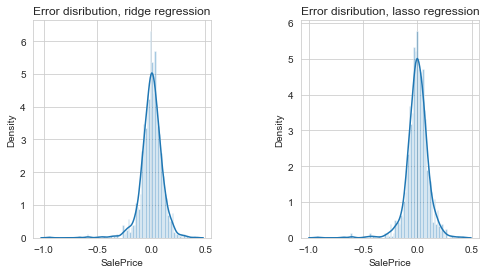

In [81]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - ridge.predict(X_train_scaled)), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - lasso.predict(X_train_scaled)), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

## Conclusion
- Optimum value for lambda in ridge regression is 20
- Optimum value for lambda in lasso regression is 0.01
- Sunrise can purchase houses below the market value by highlighting the negative parameters.
- Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.
- r2_score in train dataset: r2_score for ridge: 0.932057 , r2_score for lasso: 0.932728
- r2_score in test dataset: r2_score for ridge: 0.875826 , r2_score for lasso: 0.876002
- The variables that best describe the model are: GrLivArea, OverallQual, Age_of_house, TotalBsmtSF, OverallCond, LotArea, SaleCondition_Normal, SaleType_New, Functional, Condition1_Norm
- Out of these variables Age_of_house and Functional are negatively corelated.


## Assignment Questions Code

#### Question 1

In [82]:
# Model Building
ridge_model = Ridge(alpha=200.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sum(np.square(y_train - y_train_pred)), 4))
print('RMSE (test) : ', round(np.sum(np.square(y_test - y_pred_test)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9291
R2 score (test) :  0.8728
RMSE (train) :  12.8374
RMSE (test) :  6.3947


In [83]:
vCoefficients['DoubleRidge'] = ridge_model.coef_

In [84]:
# Createing metrics of above
metric4=[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),np.sum(np.square(y_train - y_train_pred)),np.sum(np.square(y_test - y_pred_test)),(mean_squared_error(y_train, y_pred_train))**0.5,(mean_squared_error(y_test, y_pred_test))**0.5]
ls_double_metric = pd.Series(metric4, name = 'Ridge Double Alpha')


In [85]:
# Checking values of coefficients with new model
abs(vCoefficients.loc[vCoefficients['DoubleRidge']!=0, 'DoubleRidge']).sort_values(ascending=False)[:10]

OverallQual             0.050849
GrLivArea               0.048871
1stFlrSF                0.034587
OverallCond             0.031923
TotalBsmtSF             0.031627
2ndFlrSF                0.027449
LotArea                 0.024558
Age_of_house            0.022120
SaleCondition_Normal    0.021159
BsmtFinSF1              0.021157
Name: DoubleRidge, dtype: float64

In [86]:
# Trying with double alpha value
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sum(np.square(y_train - y_train_pred)), 4))
print('RMSE (test) : ', round(np.sum(np.square(y_test - y_pred_test)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9351
R2 score (test) :  0.8837
RMSE (train) :  11.7519
RMSE (test) :  6.3947


In [87]:
# Checking values of coefficients with new model
vCoefficients['DoubleLasso'] = lasso_model.coef_
# Checking values of coefficients with new model
abs(vCoefficients.loc[vCoefficients['DoubleLasso']!=0, 'DoubleLasso']).sort_values(ascending=False)[:10]

GrLivArea               0.091489
MSZoning_RL             0.069154
OverallQual             0.066260
TotalBsmtSF             0.054645
MSZoning_RM             0.051929
Age_of_house            0.048405
OverallCond             0.044068
MSZoning_FV             0.040226
1stFlrSF                0.032257
SaleCondition_Normal    0.031677
Name: DoubleLasso, dtype: float64

In [88]:
# Final metric with double alpha values
metric5=[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),np.sum(np.square(y_train - y_train_pred)),np.sum(np.square(y_test - y_pred_test)),(mean_squared_error(y_train, y_pred_train))**0.05,(mean_squared_error(y_test, y_pred_test))**0.05]
ri_double_metric = pd.Series(metric5, name = 'Ridge Double Alpha')
final_metric['Lasso Double Alpha']=ls_double_metric
final_metric['Ridge Double Alpha']=ri_double_metric

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Lasso Double Alpha,Ridge Double Alpha
0,R2 Score (Train),0.923441,0.932057,0.932728,0.929138,0.935130
1,R2 Score (Test),0.868486,0.875826,0.876002,0.872764,0.883702
2,RSS (Train),277.844094,12.308653,12.187034,12.837408,11.751895
3,RSS (Test),20.875282,6.403724,6.394653,6.394653,6.394653
4,MSE (Train),0.108971,0.102656,0.102147,0.102147,0.796018
5,MSE (Test),0.152404,0.148090,0.147985,0.147985,0.826079


### Question 3

In [89]:
## drop them from train and test data
X_train_scaled_minus5 = X_train_scaled.drop(['GrLivArea', 'OverallQual', 'Age_of_house', 'TotalBsmtSF', 'OverallCond'], axis=1)
X_test_scaled_minus5 = X_test_scaled.drop(['GrLivArea', 'OverallQual', 'Age_of_house', 'TotalBsmtSF', 'OverallCond'], axis=1)
        
# Tring with double alpha value
lasso_model_minus5 = Lasso(alpha=0.0002)
lasso_model_minus5.fit(X_train_scaled_minus5, y_train)
y_train_pred = lasso_model_minus5.predict(X_train_scaled_minus5)
y_test_pred = lasso_model_minus5.predict(X_test_scaled_minus5)
print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sum(np.square(y_train - y_train_pred)), 4))
print('RMSE (test) : ', round(np.sum(np.square(y_test - y_pred_test)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9211
R2 score (test) :  0.8751
RMSE (train) :  14.2985
RMSE (test) :  6.3947


In [90]:
# Check the new coefficnts
vCoefficients_minus5 = pd.DataFrame(index=X_train_scaled_minus5.columns)
vCoefficients_minus5.rows = X_train_scaled_minus5.columns
vCoefficients_minus5['Minus5Lasso'] = lasso_model_minus5.coef_

abs(vCoefficients_minus5.loc[vCoefficients_minus5['Minus5Lasso']!=0, 'Minus5Lasso']).sort_values(ascending=False)[:10]

1stFlrSF                0.114282
2ndFlrSF                0.105415
MSZoning_RL             0.090025
MSZoning_RM             0.076300
MSZoning_FV             0.048366
BsmtFinSF1              0.040562
Functional              0.033513
SaleCondition_Normal    0.033115
MSZoning_RH             0.030235
Neighborhood_NridgHt    0.029619
Name: Minus5Lasso, dtype: float64